In [54]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import preprocessing, cluster, metrics
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.manifold import TSNE


import matplotlib.pyplot as plt
import matplotlib.cm as cm
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from datetime import date



# Préparation des données

In [55]:
data = pd.read_csv('data/data_cleaned.csv')
data_copy = pd.read_csv('data/data_copy.csv')
data.set_index('customer_unique_id', inplace=True)

In [56]:
for column in data :
    print(column)

Depense_tot
Nb_achat
nb_jour_dernier_achat
payment_type_boleto
payment_type_credit_card
payment_type_debit_card
payment_type_not_defined
payment_type_voucher
Nb_Paiement
Note_Moy_Review
Cat_pref
Poids_moy_colis
Longueur_moy_colis
Hauteur_moy_colis
Largeur_moy_colis


In [57]:
data_copy.columns

Index(['Unnamed: 0', 'customer_unique_id', 'Depense_tot', 'Nb_achat',
       'order_purchase_timestamp', 'nb_jour_dernier_achat',
       'payment_type_boleto', 'payment_type_credit_card',
       'payment_type_debit_card', 'payment_type_not_defined',
       'payment_type_voucher', 'Nb_Paiement', 'Note_Moy_Review', 'Cat_pref',
       'Poids_moy_colis', 'Longueur_moy_colis', 'Hauteur_moy_colis',
       'Largeur_moy_colis'],
      dtype='object')

In [58]:
data.drop(['Cat_pref'], axis=1, inplace=True)

In [59]:
data.shape

(104894, 14)

In [60]:
X = data.sample(10000, random_state=1).copy()
print('Features shape: ', X.shape)
X = pd.get_dummies(X)
print('Features shape: ', X.shape)

Features shape:  (10000, 14)
Features shape:  (10000, 14)


In [61]:
def NormalisationData(dataframe) :
    # define standard scaler
    scaler = StandardScaler()
    # transform data
    scaled = scaler.fit_transform(dataframe)
    print(scaled)
    
    return scaled

In [62]:
X_scaled = NormalisationData(X)

[[-0.41429427 -0.33556171 -1.4644913  ... -0.64943761  0.13669995
  -0.62082197]
 [-0.13216509 -0.33556171  0.80280614 ... -0.90122113 -0.02076615
  -0.62082197]
 [-0.1467893  -0.33556171  0.04482401 ... -0.01997881 -0.88682966
   0.62263064]
 ...
 [-0.38749835 -0.33556171  0.25759092 ...  1.36483055  0.37289909
   0.88908477]
 [-0.43700267 -0.33556171 -1.45784234 ... -0.52354585 -0.88682966
  -0.70964001]
 [ 1.11148321  3.61920211 -0.13469808 ...  1.30188467  3.50647433
   0.3384129 ]]


# Création de fonctions pour les différentes métriques (Silhouette et Davies Bouldin)

In [63]:
#Silhouette score
def KmeansSilhouetteScore(dataframe):
    range_n_clusters = list (range(2,10))

    scores = []

    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters)
        preds = clusterer.fit_predict(dataframe)
        centers = clusterer.cluster_centers_

        score = silhouette_score(dataframe, preds)
        #print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
        scores.append(score)

    plt.figure(figsize=(8,5))
    plt.title('Kmeans: Score de silhouette en fonction du nombre de clusters')
    sns.lineplot(range(2,10),
                 scores)

In [64]:
#Davies Bouldin score
def KmeansDaviesBouldinScore(dataframe):
    results = {}
    for i in range(2,10):
        kmeans = KMeans(n_clusters=i, random_state=30)
        labels = kmeans.fit_predict(dataframe)
        db_index = davies_bouldin_score(dataframe, labels)
        results.update({i: db_index})
    plt.figure(figsize=(8,5))
    plt.title('Kmeans: Score de Davies Bouldin en fonction du nombre de clusters')
    sns.lineplot(range(2,10),list(results.values()))

In [65]:
#HC silhouette score
def HCSilhouetteScore(dataframe):
    range_n_clusters = list (range(2,10))

    scores = []

    for n_clusters in range_n_clusters:
        clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
        preds = clusterer.fit_predict(dataframe)
        #centers = clusterer.cluster_centers_

        score = silhouette_score(dataframe, preds)
        #print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
        scores.append(score)

    plt.figure(figsize=(8,5))
    plt.title('HC: Score de silhouette en fonction du nombre de clusters')
    sns.lineplot(range(2,10),
                 scores)

In [66]:
#Davies Bouldin score
def HCDaviesBouldinScore(dataframe):
   
    results = {}
    for i in range(2,10):
        agg = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
        preds = agg.fit_predict(dataframe)
        db_index = davies_bouldin_score(dataframe, preds)
        results.update({i: db_index})
    plt.figure(figsize=(8,5))
    plt.title('HC: Score de Davies Bouldin en fonction du nombre de clusters')
    sns.lineplot(range(2,10),list(results.values()))

# Affichage des scores des différentes métriques

D:\anaconda3\envs\env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


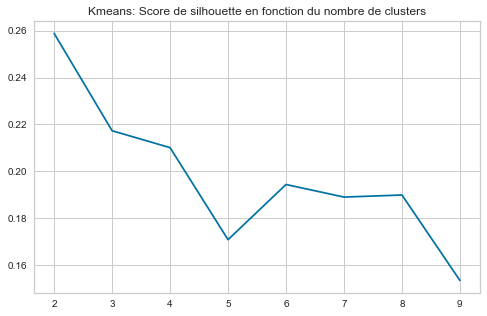

In [67]:
KmeansSilhouetteScore(X_scaled)

D:\anaconda3\envs\env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


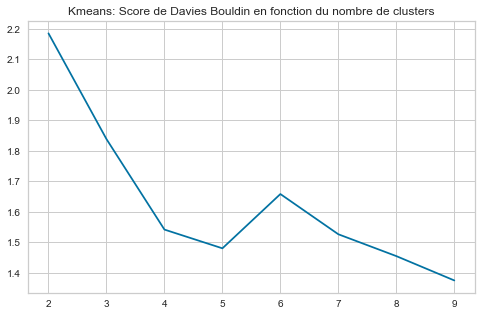

In [68]:
KmeansDaviesBouldinScore(X_scaled)

D:\anaconda3\envs\env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


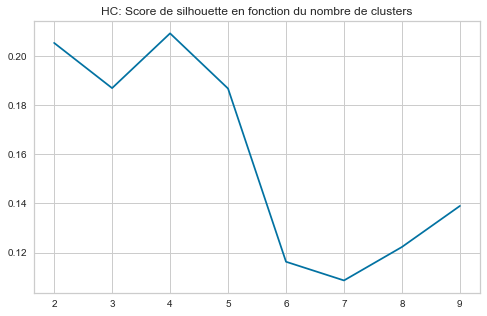

In [69]:
HCSilhouetteScore(X_scaled)

D:\anaconda3\envs\env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


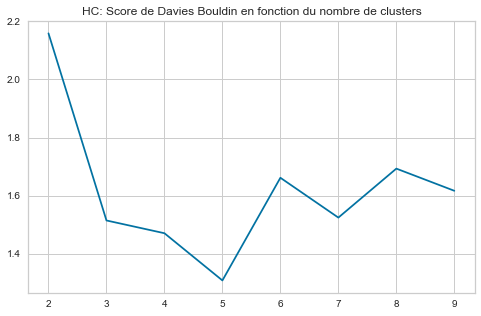

In [70]:
HCDaviesBouldinScore(X_scaled)

# Application des algorithmes de clustering sur le dataset avec un nombre de clusters = 7

In [71]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [72]:
agg = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
y_agg = agg.fit_predict(X_scaled)

In [73]:
dataset_new = X_scaled

## Affichage de l'homogénéité des clusters

KMEANS

C:\Users\Jupiter\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Jupiter\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
D:\anaconda3\envs\env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


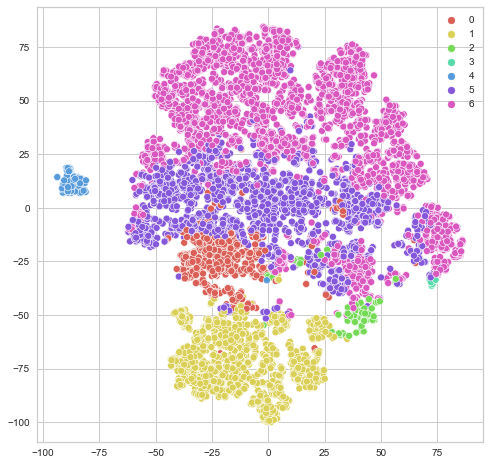

In [74]:
tsne = TSNE(n_components=2)
T = tsne.fit_transform(X_scaled.copy())

plt.figure(figsize=(8,8))
sns.scatterplot(T[:,0], T[:,1], hue = kmeans.labels_, legend='full', palette = sns.color_palette("hls",7))

AGGLOMERATIVE CLUSTERING

C:\Users\Jupiter\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Jupiter\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
D:\anaconda3\envs\env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


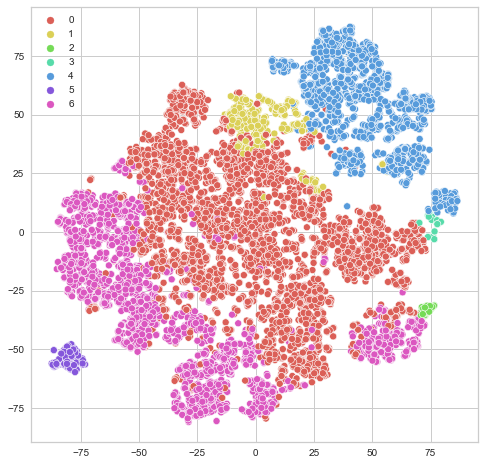

In [75]:
tsne = TSNE(n_components=2)
T = tsne.fit_transform(X_scaled.copy())

plt.figure(figsize=(8,8))
sns.scatterplot(T[:,0], T[:,1], hue = agg.labels_, legend='full', palette = sns.color_palette("hls",7))

# La robustesse des modèles

In [76]:
data_copy['order_purchase_timestamp'] = data_copy['order_purchase_timestamp'].astype('datetime64')

In [77]:
data_copy['order_purchase_timestamp'].max()

Timestamp('2018-09-03 09:06:57')

In [78]:
print(data_copy[data_copy['Nb_achat'] > 2].shape)

(6513, 18)


In [79]:
print(data_copy.where(data_copy.groupby(['customer_unique_id']).count()[
    'Nb_achat'] > 1).shape)

(104894, 18)


On va sélectionner les 1000 utilisateurs qui ont fait le plus d'achats

In [80]:
print(data_copy.groupby(['Nb_achat']).count()[
    'customer_unique_id'].sort_values(ascending=True))

Nb_achat
20.0        1
21.0        1
15.0        3
13.0        3
24.0        4
18.0        4
10.0       20
8.0        46
14.0       47
16.0       51
11.0       65
12.0       68
9.0       149
7.0       222
6.0       331
5.0       605
4.0      1398
3.0      3495
2.0     14664
1.0     83717
Name: customer_unique_id, dtype: int64


In [81]:
print(data_copy['order_purchase_timestamp'].max())
print(data_copy['order_purchase_timestamp'].min())

2018-09-03 09:06:57
2016-09-04 21:15:19


In [82]:
data_copy.shape

(104894, 18)

In [83]:
print(data_copy[data_copy['order_purchase_timestamp'] < '2018-09-03 09:06:57']. shape)
print(data_copy.where(data_copy['order_purchase_timestamp'] > '2018-05-03 08:06:57').shape)

filter = data_copy['order_purchase_timestamp'] < '2018-09-03 09:06:57'
print(filter.shape)
filter2 = data_copy['order_purchase_timestamp'] > '2018-05-03 08:06:57'
print(filter2.shape)
print(data_copy.where(filter&filter2).shape)

(104890, 18)
(104894, 18)
(104894,)
(104894,)
(104894, 18)


Densité de datas dans les différents mois

In [84]:
dates = pd.DatetimeIndex(data_copy['order_purchase_timestamp'])
d2018 = dates[data_copy['order_purchase_timestamp'] > '2017-09-03 09:06:57']
dates.year
from pandas import Index
Index.value_counts(dates.month, ascending=True)

9      4395
10     5098
12     5879
11     7799
1      8369
2      8809
4      9850
6     10272
3     10348
7     11026
5     11250
8     11799
Name: order_purchase_timestamp, dtype: int64

In [85]:
users_sample = data_copy.sort_values(['Nb_achat'], ascending=False).groupby(
        ['customer_unique_id']).head(1).head(1000)

In [86]:
users_sample

,Unnamed: 0,customer_unique_id,Depense_tot,Nb_achat,order_purchase_timestamp,nb_jour_dernier_achat,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_not_defined,payment_type_voucher,Nb_Paiement,Note_Moy_Review,Cat_pref,Poids_moy_colis,Longueur_moy_colis,Hauteur_moy_colis,Largeur_moy_colis
82153,84307,c8460e4251689ba205045f3ea17884a1,4080.00,24.0,2018-08-08 14:27:15,25.0,0.0,4.0,0.0,0.0,0.0,6.0,4.000000,telephony,700.000000,32.000000,15.000000,21.000000
28336,29097,4546caea018ad8c692964e3382debd19,31.80,21.0,2017-07-16 18:19:25,413.0,0.0,1.0,0.0,0.0,0.0,2.0,1.000000,health_beauty,809.523810,21.190476,4.095238,14.857143
80437,82542,c402f431464c72e27330a67f7b94d4fb,2000.00,20.0,2018-02-22 15:30:41,192.0,1.0,0.0,0.0,0.0,0.0,1.0,1.000000,computers_accessories,360.000000,19.000000,18.000000,15.000000
6283,6442,0f5ac8d5c31de21d2f25e24be15bbffb,1252.35,18.0,2017-11-27 12:57:35,279.0,1.0,1.0,0.0,0.0,0.0,1.0,5.000000,furniture_decor,1166.666667,58.333333,15.833333,19.166667
57772,59288,8d50f5eadf50201ccdcedfb9e2ac8455,729.62,16.0,2018-08-20 19:14:26,13.0,0.0,17.0,0.0,0.0,0.0,2.0,4.764706,sports_leisure,345.187500,28.250000,11.750000,18.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35042,35964,558e83cbe6bde610b528833d16ba588e,199.64,4.0,2017-07-18 16:50:12,411.0,0.0,1.0,0.0,0.0,0.0,6.0,1.000000,furniture_decor,650.000000,37.500000,4.500000,30.000000
23790,24400,39e16ad9a306c8729696f7732acde86f,292.37,4.0,2018-08-04 19:48:47,29.0,0.0,1.0,0.0,0.0,0.0,6.0,2.000000,bed_bath_table,1106.250000,45.000000,10.500000,39.500000
14274,14627,229eb22d6cd2e70148026fe758adf054,140.00,4.0,2018-05-03 22:41:07,122.0,0.0,1.0,0.0,0.0,0.0,3.0,1.000000,furniture_decor,1400.000000,20.000000,30.000000,20.000000
48239,49516,75a2adfe9f86d401f24b5fe2eb9a582c,302.20,4.0,2018-01-04 17:50:02,241.0,0.0,0.0,0.0,0.0,6.0,1.0,3.500000,bed_bath_table,1037.500000,34.000000,6.500000,36.500000


In [87]:
users_sample.shape

(1000, 18)

In [88]:
users_sample.columns

Index(['Unnamed: 0', 'customer_unique_id', 'Depense_tot', 'Nb_achat',
       'order_purchase_timestamp', 'nb_jour_dernier_achat',
       'payment_type_boleto', 'payment_type_credit_card',
       'payment_type_debit_card', 'payment_type_not_defined',
       'payment_type_voucher', 'Nb_Paiement', 'Note_Moy_Review', 'Cat_pref',
       'Poids_moy_colis', 'Longueur_moy_colis', 'Hauteur_moy_colis',
       'Largeur_moy_colis'],
      dtype='object')

In [89]:
users_sample.set_index('customer_unique_id', inplace=True)
users_sample.drop(['Cat_pref'], axis=1, inplace=True)

In [91]:
users_sample.columns

Index(['Unnamed: 0', 'Depense_tot', 'Nb_achat', 'order_purchase_timestamp',
       'nb_jour_dernier_achat', 'payment_type_boleto',
       'payment_type_credit_card', 'payment_type_debit_card',
       'payment_type_not_defined', 'payment_type_voucher', 'Nb_Paiement',
       'Note_Moy_Review', 'Poids_moy_colis', 'Longueur_moy_colis',
       'Hauteur_moy_colis', 'Largeur_moy_colis'],
      dtype='object')

Séparation des différentes datas en fonction des différents mois, de février à août

In [92]:
fevrier = users_sample.copy()
fevrier[users_sample['order_purchase_timestamp'] > '2018-02-01 00:00:00'] = 0
#fevrier = users_sample[users_sample['order_purchase_timestamp'] < '2018-02-01 00:00:00']
print(fevrier.shape)

mars = users_sample.copy()
mars[users_sample['order_purchase_timestamp'] > '2018-03-01 00:00:00'] = 0
print(mars.shape)

avril = users_sample.copy()
avril[users_sample['order_purchase_timestamp'] > '2018-04-01 00:00:00'] = 0
print(avril.shape)

mai = users_sample.copy()
mai[users_sample['order_purchase_timestamp'] > '2018-05-01 00:00:00'] = 0
print(mai.shape)

juin = users_sample.copy()
juin[users_sample['order_purchase_timestamp'] > '2018-06-01 00:00:00'] = 0
print(juin.shape)

juillet = users_sample.copy()
juillet[users_sample['order_purchase_timestamp'] > '2018-07-01 00:00:00'] = 0
print(juillet.shape)

aout = users_sample.copy()
aout[users_sample['order_purchase_timestamp'] > '2018-08-03 00:00:00'] = 0
print(aout.shape)

(1000, 16)
(1000, 16)
(1000, 16)
(1000, 16)
(1000, 16)
(1000, 16)
(1000, 16)


In [93]:
months = [fevrier, mars, avril, mai, juin, juillet,aout]

In [94]:
for month in months :
    
    print(month.columns)

Index(['Unnamed: 0', 'Depense_tot', 'Nb_achat', 'order_purchase_timestamp',
       'nb_jour_dernier_achat', 'payment_type_boleto',
       'payment_type_credit_card', 'payment_type_debit_card',
       'payment_type_not_defined', 'payment_type_voucher', 'Nb_Paiement',
       'Note_Moy_Review', 'Poids_moy_colis', 'Longueur_moy_colis',
       'Hauteur_moy_colis', 'Largeur_moy_colis'],
      dtype='object')
Index(['Unnamed: 0', 'Depense_tot', 'Nb_achat', 'order_purchase_timestamp',
       'nb_jour_dernier_achat', 'payment_type_boleto',
       'payment_type_credit_card', 'payment_type_debit_card',
       'payment_type_not_defined', 'payment_type_voucher', 'Nb_Paiement',
       'Note_Moy_Review', 'Poids_moy_colis', 'Longueur_moy_colis',
       'Hauteur_moy_colis', 'Largeur_moy_colis'],
      dtype='object')
Index(['Unnamed: 0', 'Depense_tot', 'Nb_achat', 'order_purchase_timestamp',
       'nb_jour_dernier_achat', 'payment_type_boleto',
       'payment_type_credit_card', 'payment_type_debit_ca

In [95]:
for month in months :
    month.drop(['order_purchase_timestamp'], axis=1, inplace=True)


# Application de kmeans sur les différents mois


In [96]:
kmeans = KMeans(n_clusters=7)
kmean_preds = {}
for i in range(0, len(months) - 1) : 
    
    # predicting the clusters
    kmean_preds[i] = kmeans.fit_predict(months[i])

C:\Users\Jupiter\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Jupiter\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Jupiter\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Jupiter\AppData\Roaming\Python\Python38\site-packages\sklearn\clust

In [97]:
print(kmean_preds[0].shape)
print(kmean_preds[1].shape)

(1000,)
(1000,)


In [98]:
print(fevrier.shape)
print(mars.shape)

(1000, 15)
(1000, 15)


In [99]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(kmean_preds[0], kmean_preds[1])

0.672183410063776

In [100]:
kmeans_ajusted_rand_score = []
for i in range(0, len(kmean_preds)-1):
    kmeans_ajusted_rand_score.append(adjusted_rand_score(kmean_preds[i], kmean_preds[i+1]))
print(kmeans_ajusted_rand_score)

[0.672183410063776, 0.8465916776130856, 0.8234071857874502, 0.9714522355039891, 0.9713455249746038]


# Application de l'Arbre hiérarchique descendant sur les différents mois

In [101]:
agg = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
agg_preds = {}
for i in range(0, len(months) - 1) : 
    
    # predicting the clusters
    agg_preds[i] = agg.fit_predict(months[i])
    

In [102]:
agg_ajusted_rand_score = []
for i in range(0, len(agg_preds)-1):
    agg_ajusted_rand_score.append(adjusted_rand_score(agg_preds[i], agg_preds[i+1]))
    
print(agg_ajusted_rand_score)

[0.5436388986959704, 0.5373691703844179, 0.6436551130530354, 1.0, 1.0]


Plot Adjusted Rand Score de kmeans

D:\anaconda3\envs\env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


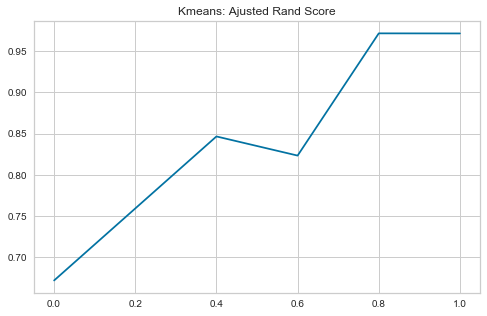

In [103]:
plt.figure(figsize=(8,5))
plt.title('Kmeans: Ajusted Rand Score')
sns.lineplot([0,0.4,0.6,0.8, 1], kmeans_ajusted_rand_score)

Plot Adjusted Rand Score de de l'Arbre hiérarchique descendant

D:\anaconda3\envs\env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


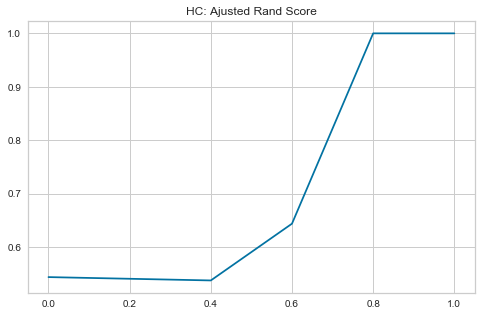

In [104]:
plt.figure(figsize=(8,5))
plt.title('HC: Ajusted Rand Score')
sns.lineplot([0,0.4,0.6,0.8, 1], agg_ajusted_rand_score)

Comparaison des deux Adjusted Rand Score des deux Algorithme de clustering

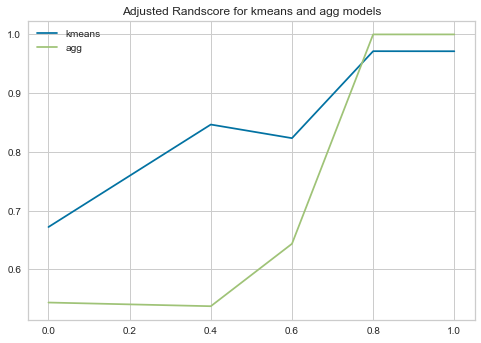

In [105]:
x = [0,0.4,0.6,0.8, 1]
y1 = kmeans_ajusted_rand_score
y2 = agg_ajusted_rand_score

plt.plot(x, y1, label= 'kmeans')
plt.plot(x, y2, label= 'agg')
plt.title('Adjusted Randscore for kmeans and agg models')
plt.legend()
plt.grid(True)
plt.show()

# Pérennité du model

In [106]:
kmeans_ajusted_rand_score2 = []
for i in range(0, len(kmean_preds)-1):
    kmeans_ajusted_rand_score2.append(adjusted_rand_score(kmean_preds[0], kmean_preds[i+1]))
print(kmeans_ajusted_rand_score)

[0.672183410063776, 0.8465916776130856, 0.8234071857874502, 0.9714522355039891, 0.9713455249746038]


D:\anaconda3\envs\env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


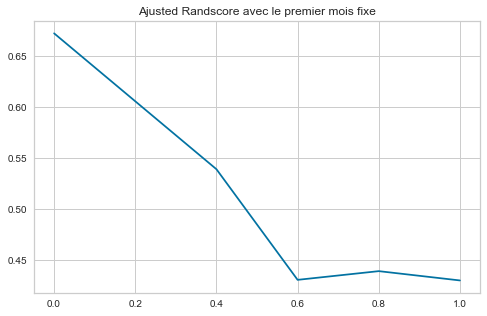

In [107]:
plt.figure(figsize=(8,5))
plt.title('Ajusted Randscore avec le premier mois fixe')
sns.lineplot([0,0.4,0.6,0.8, 1], kmeans_ajusted_rand_score2)

on doit mettre à jour le model après deux mois

# Intérprétation des différents clusters

In [108]:
import sklearn.cluster
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=0).fit(X_scaled)

In [109]:
centroids = kmeans.cluster_centers_


La taille des différents clusters

In [110]:
for i in range(len(kmeans.cluster_centers_)):
    print("Cluster", i)
    print("Size:", sum(kmeans.labels_ == i))
    print(" ")

Cluster 0
Size: 1802
 
Cluster 1
Size: 635
 
Cluster 2
Size: 128
 
Cluster 3
Size: 1312
 
Cluster 4
Size: 4028
 
Cluster 5
Size: 160
 
Cluster 6
Size: 1935
 


In [111]:
print(len(centroids))

7


In [112]:
centroids

array([[-1.86494548e-01, -3.32483271e-02,  1.68297176e-02,
         1.77890808e+00, -1.19205747e+00, -1.25709953e-01,
         0.00000000e+00, -1.51747021e-01, -6.91296521e-01,
        -6.60088513e-05, -2.50346264e-01, -1.76504999e-01,
        -1.77714487e-01, -2.38988289e-01],
       [ 9.93799980e-01, -7.08727931e-02,  9.52514394e-02,
        -8.54545668e-02, -1.00373808e-02, -1.25709953e-01,
         0.00000000e+00, -2.49944296e-03,  5.01264182e-01,
        -1.85023665e-01,  2.92724758e+00,  1.17602241e+00,
         2.29846703e+00,  1.34963014e+00],
       [ 1.97845378e+00,  5.96734313e+00, -5.46466473e-01,
         1.23207321e+00,  3.91410240e+00, -1.25709953e-01,
         0.00000000e+00,  1.96532394e+00,  7.21686023e-02,
         1.53639868e-01, -1.21209692e-01, -2.13708411e-01,
        -1.07010425e-01, -4.39293296e-02],
       [ 6.58117505e-01,  1.62925276e-01,  8.05957466e-02,
        -4.54288439e-01,  4.18180890e-01, -1.25709953e-01,
         0.00000000e+00, -1.23918713e-01,  1.

In [113]:
print(kmeans.labels_)

[4 4 3 ... 6 4 1]


In [114]:
X.columns

Index(['Depense_tot', 'Nb_achat', 'nb_jour_dernier_achat',
       'payment_type_boleto', 'payment_type_credit_card',
       'payment_type_debit_card', 'payment_type_not_defined',
       'payment_type_voucher', 'Nb_Paiement', 'Note_Moy_Review',
       'Poids_moy_colis', 'Longueur_moy_colis', 'Hauteur_moy_colis',
       'Largeur_moy_colis'],
      dtype='object')

In [115]:
for i in range(len(X.columns)):
    print(i, X.columns[i])

0 Depense_tot
1 Nb_achat
2 nb_jour_dernier_achat
3 payment_type_boleto
4 payment_type_credit_card
5 payment_type_debit_card
6 payment_type_not_defined
7 payment_type_voucher
8 Nb_Paiement
9 Note_Moy_Review
10 Poids_moy_colis
11 Longueur_moy_colis
12 Hauteur_moy_colis
13 Largeur_moy_colis


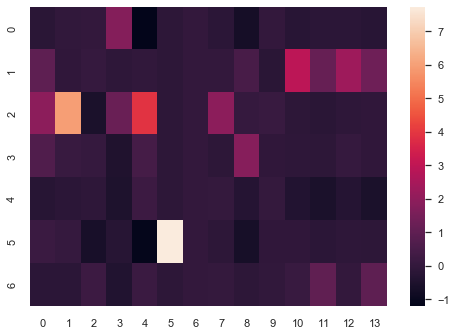

In [116]:
import numpy as np; np.random.seed(0)

import seaborn as sns; sns.set_theme()

ax = sns.heatmap(centroids)